In [1]:
import cv2
import numpy as np
import face_recognition
from typing import List, Dict, Union
from PIL import Image, ImageDraw

In [2]:
IMG_SIZE: int = 224
NUM_FRAMES_PER_VIDEO: int = 16
IMG_SIZE: int = 224

In [3]:
def video2frames(video_path: str, resize: Union[int, int] = (IMG_SIZE, IMG_SIZE)) -> np.array:
    cap = cv2.VideoCapture(video_path)
    frames: list = []
    is_there_frame: bool = True
    num_total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    resampling_rate: int = int(num_total_frames / NUM_FRAMES_PER_VIDEO)
    idf: int = 0
    while is_there_frame and len(frames) < NUM_FRAMES_PER_VIDEO:
        idf += 1
        is_there_frame, frame = cap.read()
        if frame is None: 
            return np.array([])
        if idf % resampling_rate == 0:
            # grayscale
            # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # resize
            # frame = cv2.resize(frame, resize)
            frames.append(frame)
    #assert len(frames)==NUM_FRAMES_PER_VIDEO
    print("video2frames: ", len(frames))
    return np.array(frames)

In [21]:
URL = 'http://localhost:3001/videos/'
video ='Dw7bQRvOMTPQgwaRfZThM7yKBHPp8LhCNw2wGisOZWrpc0UKEvuzCcsHiQdgr6oi.webm'
video2 = '2Y7qJJS5QdRZGem0fXuNop7AXppAgpKz3x1AWyOwjrGqWI5XFcMPO26LTah2D9op.webm'

In [4]:
url_video = "http://localhost:3001/videos/eYYDTMka7EF3p7KwOMmOGk3M0rRsev1RSvf7otoXSKHID9rwL4fSkU9LvMtyfPio.webm"


In [22]:
cvideo = URL+video
cvideo2 = URL+video2

In [5]:
frames1 = video2frames(url_video)
# frames2 = video2frames(cvideo2)
#cap2= cv2.VideoCapture(cvideo2)

In [7]:
print(frames1)
# print(frames2[0])

[]


In [91]:
test = face_recognition.face_encodings(frames1[0])[0]
test2 = face_recognition.face_encodings(frames2[0])[0]

In [92]:
mat = face_recognition.compare_faces([test], test2)
print(mat)

[True]


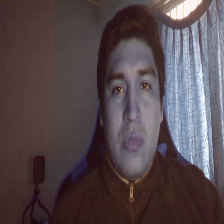

In [59]:
pil_image = Image.fromarray(frames1[0])
display(pil_image)

In [63]:
encoding = face_recognition.face_encodings(frames1[0])
print(encoding)

[array([-0.07567329,  0.09785931,  0.00641818,  0.02268891, -0.10012721,
        0.02226615, -0.02931579, -0.13877426,  0.10757335, -0.04991753,
        0.18473525, -0.06864499, -0.2869769 , -0.03278067, -0.04654398,
        0.12644334, -0.09496729, -0.13973188, -0.16604699, -0.10337313,
       -0.04569064, -0.05953437,  0.03402079, -0.02242422, -0.10666461,
       -0.31613782, -0.06984458, -0.03666148, -0.02719915, -0.03490958,
       -0.06098465, -0.04496095, -0.21412918, -0.08055992,  0.00939216,
        0.04978665, -0.0426119 ,  0.0180742 ,  0.19789839, -0.03394572,
       -0.14752354,  0.07750009,  0.16081679,  0.25463641,  0.14597228,
        0.10041326, -0.00617395, -0.04900079,  0.12593603, -0.27387127,
        0.1448898 ,  0.13491724,  0.20802855,  0.05180277,  0.10055142,
       -0.11129566, -0.06132625,  0.18219696, -0.10712308,  0.11392955,
        0.08514366, -0.01074409, -0.07848424, -0.1438203 ,  0.27639955,
        0.14703073, -0.15134424, -0.09319038,  0.11061167, -0.1

In [66]:
def makeArrayEncoding(frames: np.array) -> np.array:
    encodings: list = []
    # print(frames[0])
    for i in range(len(frames)):
        frame = frames[i]
        # print(frame)
        tmp =face_recognition.face_encodings(frame)[0]
        # print( )
        encodings.append(face_recognition.face_encodings(frame))
    return np.array(encodings)
  

In [ ]:
listEncoding = makeArrayEncoding(frames1)
listEncoding2 = makeArrayEncoding(frames2)

In [90]:
matches = face_recognition.compare_faces([listEncoding[0]], listEncoding2[0])
print(matches)

[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True

In [88]:
tmpArray= []
# results = []

for face_encoding in zip(listEncoding2):
    # print(face_encoding)
    match = face_recognition.compare_faces(listEncoding, face_encoding)
    print(len(match))
    print(len(match[0]))
    break
    # print(match[0])
    # tmpArray.append(match[0])
    #np.append(results, match)
# np.append(results, tmpArray)
# print(tmpArray)

16
128


In [78]:
# img = face_recognition.load_image_file('prueba2.jpg')
# img2=  face_recognition.load_image_file('prueba.png')
face_lo = face_recognition.face_encodings(frames[0])[0]
face_lo2 = face_recognition.face_encodings(frames[10])[0]
# face_lo3 = face_recognition.face_encodings(img2)[0]
# print(face_lo)
# print(face_lo2)
# print(face_lo3)


In [79]:
matches = face_recognition.compare_faces([face_lo], face_lo2)
print(matches)

[True]


In [59]:
num_total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(num_total_frames)

100.0


In [4]:
from .src.lib import *

ImportError: attempted relative import with no known parent package

In [ ]:
try:
    URL = 'http://localhost:3001/videos/'
    video ='6xfgIsjz2EAF4zij1TN6YSeLVjHa9AnH5Qo3URnfbvMGCZ2IgMpTd8qKHVWOozPN.webm'
    # event = json.loads(msg.decode('utf-8'))
    any_video = URL+video
    model = torchvision.models.resnet18(pretrained=True)
    for e in model.parameters():
        e.requires_grad = False
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    model.fc = nn.Linear(in_features=512, out_features=4, bias=True)
    model.load_state_dict(torch.load("../models/resnet18_5.pt"))
    model.to(device)
    frames = video2frames(any_video)
    dataset_x = []
    dataset_x = [*dataset_x, *frames]
    dataset_x = np.array(dataset_x)
    tensor_y_test = torch.as_tensor(np.array([0 for i in range(16)]))
    data_test: MyDataset = MyDataset(dataset_x, tensor_y_test)
    test_loader: DataLoader = DataLoader(dataset=data_test, shuffle=False)
    res = []
    for images, _ in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        res.append(np.array(predicted.cpu())[0])
    return st.mode(res) == 0
except Exception as e:
    print(e)
    return False